# Logistic regression

$\text{Output of the logistic regression can be denoted as follow: }$

$$f(x) = \theta(\bold{w}^{T} x)$$

$\quad \theta \text{ is known as logistic function. Some activations for the linear model are shown in the figure below:}$

![](activations.png)

$\text{ - Sigmoid function: }$

$$f(s) = \frac{1}{1 + e^{-s}} \triangleq \sigma(s)$$

$$\lim_{x\to - \infty} \sigma(s) = 0; \quad \lim_{x\to \infty} \sigma(s) = 1$$

$\text{ - Derivative Sigmoid function: }$

$$\sigma'(s) = \frac{e^{-s}}{(1 + e^{-s})^2}$$

$$\quad \quad \quad = \frac{1}{1 + e^{-s} \frac{e^{-s}}{1 + e^{-s}}}$$

$$\quad \quad \quad \quad = \sigma(s)(1 - \sigma(s))$$

$\text{ - loss function for logistic regression is: }\bold{\text{Log loss}}$

![](logloss.png)

$\quad \text{or:}$

$$J(\bold{w};{x}_{i};{y}_{i}) = - ({y}_{i} \log_{} {z}_{i} + (1 - {y}_{i} \log_{} {(1 - {z}_{i})}))$$

$$ {x}_{i}, {y}_{i} \text{: input and target}$$

$$ {z}_{i} \text{: y\_pred}$$

$\text{ - derivative of the loss function: }$

$$\frac{∂ J(\bold{w};{x}_{i};{y}_{i})}{∂\bold{w}} = - (\frac{{y}_{i}}{{z}_{i}} - \frac{1 - {y}_{i}}{1 - {z}_{i}}) \frac{∂ {z}_{i}}{∂\bold{w}}$$

$$ = \frac{{z}_{i} - {y}_{i}}{{z}_{i} (1 - {z}_{i})} \frac{∂ {z}_{i}}{∂\bold{w}}$$

![](cost_derivative.png)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
from sklearn.linear_model import LogisticRegression

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    total_cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        total_cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    total_cost = total_cost / m
    return total_cost
    

![](logisticGD.png)

In [7]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter

    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        dj_db = dj_db + err_i
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    # OR THIS:

    # for i in range(m):
    #     f_wb = sigmoid(np.dot(X[i],w) + b)
        
    #     dj_db_i = f_wb - y[i]
        
    #     dj_db += dj_db_i
        
    #     for j in range(n): 
    #         dj_dw_ij = (f_wb - y[i])* X[i][j]
    #         dj_dw[j] += dj_dw_ij
            
    # dj_dw = dj_dw / m
    # dj_db = dj_db / m
        
    return dj_db, dj_dw  

In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [40]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   

        # Calculate f_wb (exactly how you did it in the compute_cost function above) 
        # using a couple of lines of code
        f_wb = sigmoid(np.dot(X[i],w) + b)

        # Calculate the prediction for that training example 
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
  
    return p

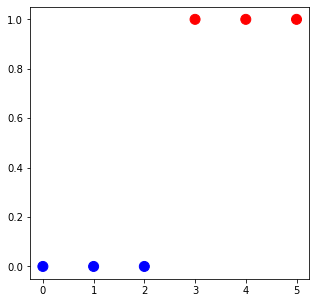

In [37]:
# prepare data
x_train = np.array([[0., 1, 2, 3, 4, 5]]).T
y_train = np.array([0,  0, 0, 1, 1, 1])
# plot data
plt.figure(figsize=(5,5))
color_list = ['red' if i == 1 else 'blue' for i in y_train]
plt.scatter(x_train, y_train, s=[100 for i in range(len(y_train))], c=color_list)
plt.show()

In [38]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
w, b, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, 0.01, 10000)

[0.]
Iteration    0: Cost 0.6875866309962527   
Iteration 1000: Cost 0.3354646281271492   
Iteration 2000: Cost 0.24918046111494271   
Iteration 3000: Cost 0.20575170436002863   
Iteration 4000: Cost 0.17899910413931922   
Iteration 5000: Cost 0.16047916009714497   
Iteration 6000: Cost 0.1466729892752192   
Iteration 7000: Cost 0.1358470911626451   
Iteration 8000: Cost 0.12704310299157853   
Iteration 9000: Cost 0.11968482924040207   


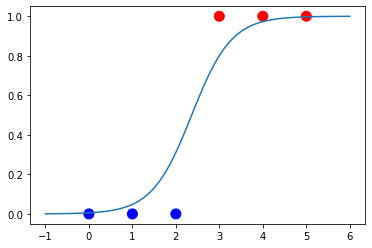

In [39]:
x = np.linspace(-1, 6, 100)
y = sigmoid(w * x + b)
plt.plot(x,y)
color_list = ['red' if i == 1 else 'blue' for i in y_train]
plt.scatter(x_train, y_train, s=[100 for i in range(len(y_train))], c=color_list)
plt.show()

In [41]:
x_test = np.array([[0.7, 2.5, 7]]).T
y_pred = predict(x_test, w, b)
y_pred

array([0., 1., 1.])